# Homework-2

![](https://i.milliyet.com.tr/MolatikDetayBig/2018/04/10/fft371_mf28323237.Jpeg)

1. [Soru 1](#0)
2. [Soru 2](#1)
3. [Soru 3](#2)
4. [Soru 4](#3)
5. [Soru 5](#4)
6. [Soru 6](#5)
7. [Soru 7](#6)
8. [Soru 8](#7)
9. [Soru 9](#8)
10. [Soru 10](#9)


In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [516]:
titanic = pd.read_csv("train.csv")
df = titanic.copy()
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="0"></a>
## Soru 1:

* Kazada ölenlerin yaş ortalamasını bulunuz

In [517]:
df.groupby(["Survived"])["Age"].mean()[0]

30.62617924528302

* Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını bulunuz

In [518]:
df.groupby(["Survived"])["Fare"].mean()[0]

22.117886885245877

In [519]:
df.groupby(["Survived"])["Fare"].median()[0]

10.5

* Kazada ölen erkeklerin yaş ortalamasını bulunuz


In [520]:
df.groupby(["Survived","Sex"])["Age"].mean()[1:2]

Survived  Sex 
0         male    31.618056
Name: Age, dtype: float64

<a id="1"></a>
## Soru 2:

* Kazadan kurtulanların yaş ortalamasını bulunuz

In [521]:
df.groupby(["Survived"])["Age"].mean()[1]

28.343689655172415

* Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz


In [522]:
df.groupby(["Survived"])["Fare"].mean()[1]

48.39540760233917

* Kazadan kurtulan toplam kişi sayısını bulunuz

In [523]:
df["Survived"].value_counts()[1]

342

* Kazadan kurtulan erkeklerin yaş ortalamasını bulunuz

In [524]:
df.groupby(["Survived","Sex"])["Age"].mean()[3:4]

Survived  Sex 
1         male    27.276022
Name: Age, dtype: float64

* Kazadan kurtulan kadınların yaş ortalamasını bulunuz

In [525]:
df.groupby(["Survived","Sex"])["Age"].mean()[2:3]

Survived  Sex   
1         female    28.847716
Name: Age, dtype: float64

<a id="2"></a>
## Soru 3:

* 10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [526]:
df_10_kucuk = df[df.Age<10]
df_10_kucuk["Fare"].median()

27.0

* 10 yaşından büyüklerin bilet fiyatlarının medyan değerini bulunuz

In [527]:
df_10_buyuk = df[df.Age>10]
df_10_buyuk["Fare"].median()

13.92915

<a id="3"></a>
## Soru 4:

* 1.sınıf, 2.sınıf ve 3.sınıf yolcuların ölüm oranlarını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [528]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [529]:
p11, p10 = len(df[(df.Pclass == 1) & (df.Survived == 1)]), len(df[(df.Pclass == 1) & (df.Survived == 0)]) 
p21, p20 = len(df[(df.Pclass == 2) & (df.Survived == 1)]), len(df[(df.Pclass == 2) & (df.Survived == 0)]) 
p31, p30 = len(df[(df.Pclass == 3) & (df.Survived == 1)]), len(df[(df.Pclass == 3) & (df.Survived == 0)]) 

In [530]:
def ratio(alive,dead,pclass):
    r = dead/(alive+dead) * 100
    print("%d. sınıfa ait olan insanlarda yüzde %d oranında kayıp bulunmaktadır." %(pclass, r))

In [531]:
ratio(p11,p10,1)
ratio(p21,p20,2)
ratio(p31,p30,3)

1. sınıfa ait olan insanlarda yüzde 37 oranında kayıp bulunmaktadır.
2. sınıfa ait olan insanlarda yüzde 52 oranında kayıp bulunmaktadır.
3. sınıfa ait olan insanlarda yüzde 75 oranında kayıp bulunmaktadır.


In [532]:
#Yorumum
print("İlk olarak yolcuların sayılarını inceledim ve en fazla 3.sınıf yolcuların bu gemide olduğunu tespit ettim. Daha sonra ise yolcuların sınıflarına göre hayatta kalma ve hayatta kalmama sayılarını buldum."+
      " En son yaptığım işlemde ise sınıflar arası ölüm oranını inceledim. Bu sonuca göre en fazla ölüm oranının 3. sınıf yolcularda olduğunu, daha sonra ise 2. ve 1. sınıf olarak azaldığını görmekteyim."+
      " Bu durumda geminin alt taraflarında 3.sınıf yolcuların ortalarda 2.sınıf yolcuların ve geminin üst taraflarında da 1.sınıf yolcuların olabileceğini tahmin ediyorum")

İlk olarak yolcuların sayılarını inceledim ve en fazla 3.sınıf yolcuların bu gemide olduğunu tespit ettim. Daha sonra ise yolcuların sınıflarına göre hayatta kalma ve hayatta kalmama sayılarını buldum. En son yaptığım işlemde ise sınıflar arası ölüm oranını inceledim. Bu sonuca göre en fazla ölüm oranının 3. sınıf yolcularda olduğunu, daha sonra ise 2. ve 1. sınıf olarak azaldığını görmekteyim. Bu durumda geminin alt taraflarında 3.sınıf yolcuların ortalarda 2.sınıf yolcuların ve geminin üst taraflarında da 1.sınıf yolcuların olabileceğini tahmin ediyorum


* 1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarını karşılaştırınız

In [533]:
 df.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [534]:
df.groupby(["Pclass"])["Fare"].std()

Pclass
1    78.380373
2    13.417399
3    11.778142
Name: Fare, dtype: float64

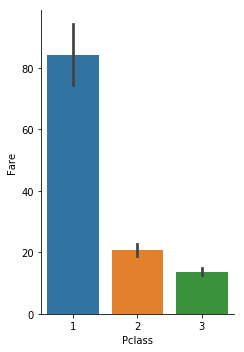

In [536]:
g = sns.catplot(x="Pclass", y="Fare",
                data=df, kind="bar",
                height=5, aspect=.7);

<a id="4"></a>
## Soru 5:

* Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [537]:
df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [538]:
f1, f0 = len(df[(df.Sex == "female") & (df.Survived == 1)]), len(df[(df.Sex == "female") & (df.Survived == 0)]) 
m1, m0 = len(df[(df.Sex == "male") & (df.Survived == 1)]), len(df[(df.Sex == "male") & (df.Survived == 0)]) 

In [539]:
def ratio1(alive,dead):
    r = 100 * dead//(alive+dead) 
    return r   

In [540]:
print("Kazada ölen kadınların oranı yüzde :",ratio1(f1,f0))
print("Kazada ölen erkeklerin oranı yüzde :",ratio1(m1,m0))

Kazada ölen kadınların oranı yüzde : 25
Kazada ölen erkeklerin oranı yüzde : 81


In [541]:
print("Kazada ölen kadınların oranı %25 ve ölen erkeklerin oranı da %81 olduğununu görüyoruz. Önceki sorunun cevabında en çok ölen sınıfın 3.sınıfa ait olduğunu görmüştük. Bu sorunun cevabı ile birlikte 3.sınıfta olan yolcuların çoğunluğunun erkek yolcular olduğunu söyleyebiliriz.")

Kazada ölen kadınların oranı %25 ve ölen erkeklerin oranı da %81 olduğununu görüyoruz. Önceki sorunun cevabında en çok ölen sınıfın 3.sınıfa ait olduğunu görmüştük. Bu sorunun cevabı ile birlikte 3.sınıfta olan yolcuların çoğunluğunun erkek yolcular olduğunu söyleyebiliriz.


<a id="5"></a>
## Soru 6:

* Kazada ölen erkeklerin ortalama bilet fiyatı ile kurtulan erkeklerin ortalama bilet fiyatını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [542]:
df.groupby(["Survived","Sex"])["Fare"].mean()[1:2]

Survived  Sex 
0         male    21.960993
Name: Fare, dtype: float64

In [543]:
df.groupby(["Survived","Sex"])["Fare"].mean()[3:4]

Survived  Sex 
1         male    40.821484
Name: Fare, dtype: float64

In [544]:
print("Burada da ölen erkeklerin ortalama fiyatlarının 21, kurtulanların ise 40 olduğunu görmekteyiz. Bu durum bir üstteki cevabımızı destekliyor. Ölen erkeklerin çoğunun bileti düşük fiyatlı olan 3. sınıf yolculara aittir.")

Burada da ölen erkeklerin ortalama fiyatlarının 21, kurtulanların ise 40 olduğunu görmekteyiz. Bu durum bir üstteki cevabımızı destekliyor. Ölen erkeklerin çoğunun bileti düşük fiyatlı olan 3. sınıf yolculara aittir.


# Missing Value Doldurma

In [545]:
missing = pd.read_csv("train_missing.csv")
df_missing = missing.copy()
display(df_missing)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,NaN,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000,C148,NaN


In [546]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        721 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         800 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     718 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [547]:
df_missing.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp          170
Parch            0
Ticket           0
Fare            91
Cabin          687
Embarked       173
dtype: int64

In [548]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df_missing) 

,Missing Values,% Value
Cabin,687,77
Age,177,19
Embarked,173,19
SibSp,170,19
Fare,91,10
Ticket,0,0
Parch,0,0
Sex,0,0
Name,0,0
Pclass,0,0


<a id="6"></a>
## Soru 7

* Age, Embarked ve Fare değişkenlerini mean/median/mode değerlerini kullanarak değişken tipine uygun olacak şekilde doldurunuz.

### Age

In [549]:
df_missing.Age.median() #28
df_missing.Age.fillna(df_missing.Age.median(),inplace=True)
df_missing.Age = df_missing.Age.astype(np.int64)

### Embarked

In [550]:
df_missing.Embarked.mode() #S

0    S
dtype: object

In [551]:
df_missing.Embarked.value_counts()

S    529
C    128
Q     61
Name: Embarked, dtype: int64

In [552]:
df_missing.groupby(["Embarked"])["Fare"].mean()

Embarked
C    57.351678
Q    14.058261
S    27.234102
Name: Fare, dtype: float64

In [553]:
df_Embarked = df_missing[df_missing['Embarked'].isin([np.nan])]

In [555]:
df_Embarked.Embarked.fillna("T",inplace=True)

In [556]:
df_Embarked.groupby(["Embarked"])["Fare"].mean()

Embarked
T    32.983571
Name: Fare, dtype: float64

In [557]:
df_missing.Embarked.fillna(df_missing.Embarked.mode()[0], inplace = True) #S

**Burada yapmak istediğim işlem Embarked sütununda eksik olan değerlerin ücret ortalamalarını görmek istedim. Daha sonra da buradaki ortalamanın "S" limanından binen yolcuların ortalamalarına yakın oldukları için bu eksik değerlere "S" değerinin atadım.**

### Fare

In [558]:
df_missing.groupby(["Embarked"])["Fare"].mean()

Embarked
C    57.351678
Q    14.058261
S    28.673762
Name: Fare, dtype: float64

In [559]:
df_fare = df_missing[df_missing.Fare.isin([np.nan])]
df_fare.Embarked.value_counts()

S    75
C    11
Q     5
Name: Embarked, dtype: int64

In [560]:
df_missing.Fare.isna().sum()

91

In [561]:
df_missing["Fare"] = df_missing.groupby("Embarked")["Fare"].transform(lambda x: x.fillna(x.mean()))

In [562]:
df_missing.Fare.isna().sum()

0

**Fare değişkeninin eksik değerlerini doldurmak için yolcuların bindikleri limanlara göre ödedikleri ücretlerin ortalamasını alıp, doldurma işlemini gerçekleştirdim. Örneğin "S" limanından binen yolcuların ödedikleri ücretlerin ortalamasını, "S" limanından binen ama fiyatı eksik olan yolculara atadım.**

<a id="7"></a>
## Soru 8

* SibSp değişkeni hangi yöntemler ile doldurulabilir, fikir yürütün. Uygun bir yöntem ile doldurun. (SibSp değişkeni kişilerin gemide bulunan kardeş/eş sayısını belirtiyor.)

In [563]:
df_missing.SibSp.value_counts()

0.0    489
1.0    173
2.0     21
4.0     16
3.0     12
8.0      7
5.0      3
Name: SibSp, dtype: int64

In [564]:
df_missing.groupby(["Pclass","Embarked","SibSp"])["Fare"].median()

Pclass  Embarked  SibSp
1       C         0.0       57.351678
                  1.0       79.200000
                  2.0      262.375000
        Q         1.0       90.000000
                  2.0       90.000000
        S         0.0       30.000000
                  1.0       71.000000
                  2.0      133.650000
                  3.0      263.000000
2       C         0.0       14.454150
                  1.0       30.070800
        Q         0.0       12.350000
        S         0.0       13.000000
                  1.0       26.000000
                  2.0       28.673762
3       C         0.0        7.895800
                  1.0       14.454200
                  2.0       19.258300
        Q         0.0        7.750000
                  1.0       15.500000
                  2.0       23.250000
                  4.0       29.125000
        S         0.0        7.925000
                  1.0       17.400000
                  2.0       18.629150
                  3.0     

In [565]:
from sklearn.impute import SimpleImputer

In [566]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_missing.SibSp = imp.fit_transform(df_missing[['SibSp']])
df_missing.SibSp.isna().sum()

0

**Bu doldurma yönteminde aklıma sınıf,liman ve çocuk sayısına göre ödenen ücretlerini bulup en azından buradaki ortalamalar ile uygun eksik değerleri doldurmak geldi, fakat çok zaman alacağını düşündüğüm için SimpleImputer ile mod'a göre doldurma işlemi uyguladım.**

<a id="8"></a>
## Soru 9

* Datayı baştan okuyun. Embarked değişkenini "NAN" şeklinde yeni bir kategorisi olacak şekilde doldurun.

In [431]:
missing = pd.read_csv("train_missing.csv")
df_missing2 = missing.copy()
display(df_missing2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,NaN,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000,C148,NaN


In [432]:
df_missing2.Embarked.fillna("NaN",inplace = True)

In [433]:
df_missing2.Embarked.value_counts()

S      529
NaN    173
C      128
Q       61
Name: Embarked, dtype: int64

<a id="9"></a>
## Soru 10

* "Fare" değişkeni için "Fare_Missing" adında yeni bir değişken türetip "Fare" değişkenini median ile doldurun.

In [436]:
fare_null_index = df_missing2.Fare[df_missing2.Fare.isnull()].index.to_list()

In [437]:
df_missing2.insert(10,"Fare_Missing",0)
df_missing2.loc[fare_null_index, "Fare_Missing"] = 1

In [456]:
df_missing2.Fare_Missing.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    0
14    0
Name: Fare_Missing, dtype: int64

In [457]:
df_missing2.Fare.fillna(df_missing2.Fare.median(),inplace = True)

In [458]:
df_missing2.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fare_Missing,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.25000,0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.28330,0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.92500,0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.10000,0,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.05000,0,NaN,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0.0,0,330877,8.45830,0,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0,17463,51.86250,0,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,NaN,1,349909,21.07500,0,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,NaN,2,347742,11.13330,0,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0,237736,30.07080,0,NaN,C
